# Model Selection

In the past two sections, we've covered quite a bit of ground in our understanding of Stochastic Block Models. We introduced the Structured Independent Edge Model, a generalization of the Stochastic Block Model that allows us to compare probabilities of various edge clusters in the network. Next, we introduced the community detection problem, and showed how the adjacency spectal embedding coupled with various adjustments of unsupervised clustering techniques allowed us to learn estimated community assignments $\vec z$ fo the nodes of the network. We then learned how we can use these community assignments to produce estimates of the block matrix, $\hat B$, so that we have a useful model of the network.

As we have learned over the course of the book so far, one of our core aims in machine learning is to identify the *simplest* model that maintains a *faithful* representation of the underlying data with which we are presented. Imagine we toss two identical fair coins $20$ times and $10$ times respectively, which each have $p_1 = p_2 = p = 0.5$ (the probability of landing on heads, $0.5$, is identical to the probability of landing on tails). The first coin lands on heads $11$ times out of $20$ flips, and the second coin lands on heads $4$ times. In truth, these coins are identical; we simply, by chance, produced estimates $\hat p_1 = \frac{11}{20} = 0.55$ and $\hat p_2 = \frac{4}{10} = 0.4$. In reality, the best estimate of $\hat p$, the true probability, would be to *pool* across the two samples, which would give us that $\hat p = \frac{15}{30} = 0.5$. The problem here is, when we have a real sample of data, we *don't know* that $p_1 = p_2$. As we learned in the preceding section, we can derive hypotheses tests where $H_0: p_1 = p_2$ against $H_a: p_1 = p_2$, and we can simply test these hypotheses directly. Let's say we didn't flip two coins, however. Let's say we flipped three coins, where in reality $p_1 = p_2 = 0.5$, and $p_3 = 0.4$. We need to build upon our two-sample hypothesis testing strategies in order to produce ideal inference about the relationships between $p_1$, $p_2$, and $p_3$. To answer these sorts of questions, we turn to *model selection*. 

**Model selection** is the task of presenting several possible statistical models which we think describe our sample and using quantitative strategies to determine which statistical models are best supported by the samples with which we are presented. In our coin flip example with three coins where $p_1$ and $p_2$ are equal but $p_3$ is diffferent, this means that we use the sample to determine reasonable statistical models that could be possible. In the context of coin flipping experiments, the statistical models are delineated by the types of coins that could have reasonably been used for the experiment. For instance, we might propose a statistical model where $p_1 = p_2 = p_3$, another model where $p_1 = p_2$ but $p_3$ does not equal $p_1$ nor $p_2$, and a third model where $p_1$, $p_2$, and $p_3$ were all different. As an observer, you might say, this subset of three possible statistical model misses quite a few possibilities! There is another possible model where $p_2 = p_3$ but $p_1$ does not equal $p_2$ nor $p_3$, and another where $p_1 = p_3$ but $p_2$ does not equal $p_1$ nor $p_3$. Each of these models has a corresponding hypothesis under which the model is "correct". When we actually want to select the bests model, however, we will use the fact a specific property of the hypotheses we actually chose, the fact that they are *sequentially nested*, to identify the best statistical model supported by the sample. 

## Sequentially nested hypotheses allow us to choose the best hypothesis from the candidates

Let's formalize this situation a little bit more. We have the following three hypotheses. $H_0: p_1 = p_2 = p_3 = a$, against $H_1: p_1 = p_2 = a$, but $p_3 = c$. Finally, we have $H_2: p_1 = a$, $p_2 = b$, and $p_3 = c$. The hypothesis $H$ is **nested** in the hypothesis $H'$ if whenever $H$ is true, $H'$ is also true. In this sense, the hypothesis $H'$ is said to contain the hypothesis $H$. Let's consider $H_0$ and $H_1$, for instance. Notice that if $H_0$ is true, then $p_1 = p_2 = p_3 = a$. However, $H_1$ is also true, since $p_1 = p_2 = a$, and $p_3= c$ can also be set equal to $p_1$ and $p_2$ if $c = a$. A sequence of hypotheses $H_0, H_1, ..., H_n$ is called **sequentially nested** if $H_0$ is nested in $H_1$, which is nested in $H_2$, so on and so forth up to $H_{n-1}$ is nested in $H_n$. Note that the sequence of hypotheses that we presented for our three coin example are sequentially nested. We already saw that $H_0$ was nested in $H_1$. Now, let's compare $H_2$ to $H_1$. Notet that if $a = b$, that $p_1 = p_2$, and $p_3 = c$, exactly as in $H_1$, so $H_1$ is nested in $H_2$. Therefore, since $H_0$ is nested in $H_1$ and $H_1$ is nested in $H_2$, The sequence $H_0$, $H_1$, and $H_2$ are sequentially nested. 

What advantage does sequentially nesting hypotheses give us? In statistics, and in particular when dealing with sequences of hypothesis tests all of which correspond to candidate models which are based on the Bernoulli distribution, statistical tests can be used to *provably* identify the best candidate model corresponding to a hypothesis. This means that we can select one of the $n$ total hypotheses amongst $H_0, ..., H_n$, and can use the results of this hypothesis to construct a statistical model which is best supported by the data. This distinction is key for numerous statistical results, and will form the foundation of our development of model selection approaches for network machine learning.  

## Developing sequentially nested hypotheses for network data

What does this have to do with network data? Let's imagine that we are presented with the school network that we are accustomed to. $100$ students attend one of two schools. Nodes are students, and edges represent whether a pair of students are friends. We'll imagine we've already performed community detection on the network, and have sorted the nodes based on the school to which the students attend: 

In [1]:
from graspologic.simulations import sbm
import numpy as np

ns = [50, 50]  # network with 100 nodes
B = [[0.4, 0.2], [0.2, 0.45]]  # block matrix

# sample a single simple adjacency matrix from SBM(z, B)
A = sbm(n=ns, p=B, directed=False, loops=False)
zs = [1 for i in range(0, 50)] + [2 for i in range(0, 50)]

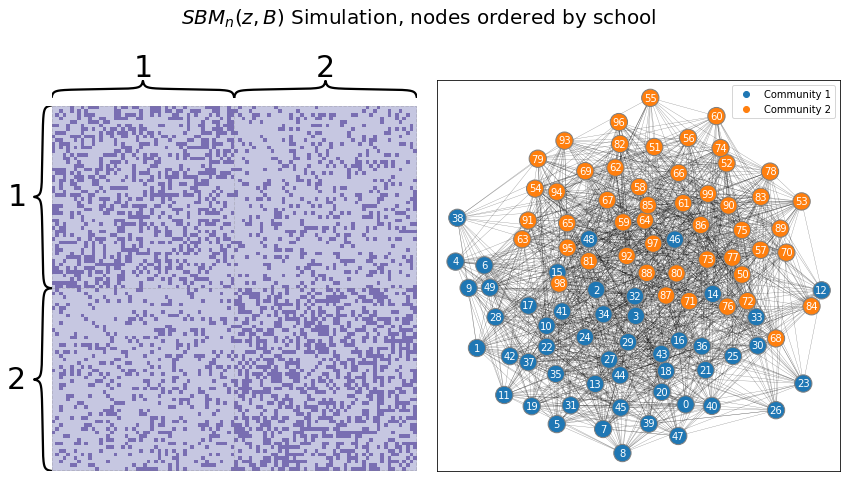

In [2]:
from graphbook_code import draw_multiplot
import matplotlib.pyplot as plt

draw_multiplot(A, labels=zs, title="$SBM_n(z, B)$ Simulation, nodes ordered by school");

Remember in the two-block SBM, that we have the following block matrix:
\begin{align*}
    B &= \begin{bmatrix}
        b_{11} & b_{12} \\ b_{21} & b_{22}
    \end{bmatrix}
\end{align*}

The network is undirected by construction, so by definition, $b_{21} = b_{12}$. But what about the other entries to the block matrix? It seems pretty clear that the on-diagonal blocks have a different probability than the off-diagonal blocks, so perhaps it seems reasonable to conclude that $b_{11}, b_{22} \neq b_{12}, b_{21}$. But what about the on-diagonal blocks? What can we say about the relationship between $b_{11}$ and $b_{22}$? To begin to perform inference on $B$, we need a community assignment vector $\vec z$, which was the vector whose entries $z_{i}$ indicate which of the $K$ communities the node $i$ is part of. For the purposes of this section, we will assume that we are either handed the community assignment vector $\vec z$ with our sample, or we have estimated it using community detection, as we explored in the [preceding section](#link?). Next, we use the community assignment vector (or the estimated community assignment vector, $\hat{\vec z}$) to produce an estimate of the block matrix, $\hat B$:

In [ ]:
from graphbook_code import SBMEstimator

sbm_mod = 